In [1]:
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    tf.config.experimental.set_virtual_device_configuration(
        gpus[0],[tf.config.experimental.VirtualDeviceConfiguration(memory_limit=512)])
  except RuntimeError as e:
    print(e)

In [3]:
from facefilterlib import find, verify, analyze

Time taken to load Face model:  3.1080312728881836  seconds
Time taken to load Gender model:  3.1719648838043213  seconds
Time taken to load Age model:  3.388038396835327  seconds
Time taken to load Ethnicity model:  3.1130025386810303  seconds


In [83]:
person_no = 1
filter_no = 2

In [84]:
original_img = "Dataset/Image_Data/{}/{}_Original.jpg".format(person_no, person_no)
filtered_img = "Dataset/Image_Data/{}/{}_Filtered_{}.jpg".format(person_no, person_no, filter_no)

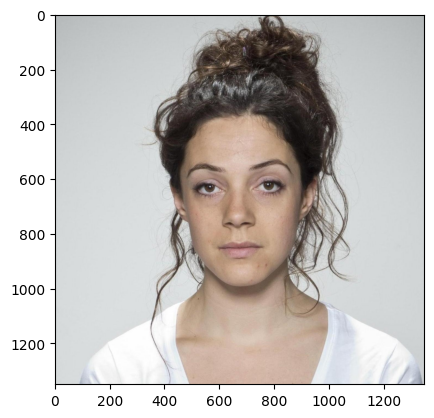

In [85]:
img1 = cv2.imread(original_img)
plt.imshow(img1[:, :, ::-1])

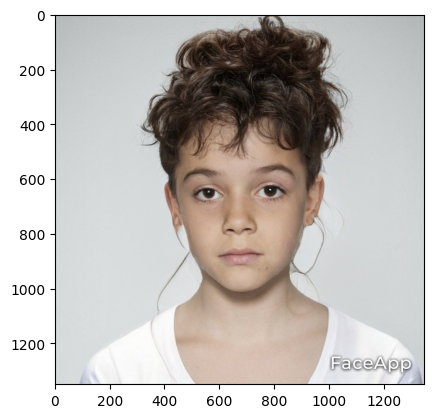

In [86]:
img2 = cv2.imread(filtered_img)
plt.imshow(img2[:, :, ::-1])

In [87]:
res = verify(file_path1 = original_img, file_path2 = filtered_img)

Time taken = 0.42600440979003906 seconds


In [88]:
res

{'verified': True, 'distance': 0.078039326}

In [90]:
df = find(file_path = filtered_img)

Time taken = 0.1940138339996338 seconds
Predicted Label is: 1 with probability = 0.8388798


In [91]:
df.head()

,Predicted Label,Probability
0,1,0.8388798
1,35,0.05421405
2,42,0.030076835
3,13,0.020163104
4,89,0.01422066


In [95]:
tp,total = 0,0
incorrect = []
missed = []
for person_no in range(1, 103):
    for filter_no in range(1, 11):
        filtered_img = "Dataset/Image_Data/{}/{}_Filtered_{}.jpg".format(person_no, person_no, filter_no)
        df = find(file_path = filtered_img)
        labels = [int(x) for x in df['Predicted Label'][:5]]
        prob = [float(x) for x in df['Probability'][:5]]
        predicted_label = labels[0]
        if prob[0] < 0.9:
            if person_no in labels:
                predicted_label = person_no
        if predicted_label == person_no:
            tp += 1
        else:
            incorrect.append({'Image': filtered_img, 'Prediction': df.head()})
        total += 1

Time taken = 0.20399904251098633 seconds
Predicted Label is: 1 with probability = 0.9664727
Time taken = 0.23200035095214844 seconds
Predicted Label is: 1 with probability = 0.8388798
Time taken = 0.2420060634613037 seconds
Predicted Label is: 1 with probability = 0.66383463
Time taken = 0.29799914360046387 seconds
Predicted Label is: 1 with probability = 0.82426924
Time taken = 0.2859988212585449 seconds
Predicted Label is: 1 with probability = 0.90295684
Time taken = 0.25899505615234375 seconds
Predicted Label is: 1 with probability = 0.8492042
Time taken = 0.26499009132385254 seconds
Predicted Label is: 1 with probability = 0.9866058
Time taken = 0.2640035152435303 seconds
Predicted Label is: 56 with probability = 0.75604796
Time taken = 0.2709951400756836 seconds
Predicted Label is: 1 with probability = 0.86834764
Time taken = 0.26600098609924316 seconds
Predicted Label is: 1 with probability = 0.991638
Time taken = 0.2650032043457031 seconds
Predicted Label is: 89 with probability

Time taken = 0.3130044937133789 seconds
Predicted Label is: 9 with probability = 0.43433666
Time taken = 0.31600046157836914 seconds
Predicted Label is: 89 with probability = 0.41539603
Time taken = 0.25600218772888184 seconds
Predicted Label is: 89 with probability = 0.37743136
Time taken = 0.2709999084472656 seconds
Predicted Label is: 10 with probability = 0.32712585
Time taken = 0.2980022430419922 seconds
Predicted Label is: 10 with probability = 0.7320536
Time taken = 0.276003360748291 seconds
Predicted Label is: 10 with probability = 0.55753684
Time taken = 0.3130016326904297 seconds
Predicted Label is: 10 with probability = 0.99277884
Time taken = 0.2779994010925293 seconds
Predicted Label is: 10 with probability = 0.28395364
Time taken = 0.2780003547668457 seconds
Predicted Label is: 3 with probability = 0.76545715
Time taken = 0.27299976348876953 seconds
Predicted Label is: 10 with probability = 0.4877304
Time taken = 0.26900410652160645 seconds
Predicted Label is: 89 with pro

Time taken = 0.24500203132629395 seconds
Predicted Label is: 18 with probability = 0.4874856
Time taken = 0.24599742889404297 seconds
Predicted Label is: 18 with probability = 0.8893793
Time taken = 0.23800134658813477 seconds
Predicted Label is: 89 with probability = 0.6477906
Time taken = 0.24599766731262207 seconds
Predicted Label is: 89 with probability = 0.7266318
Time taken = 0.24500083923339844 seconds
Predicted Label is: 19 with probability = 0.71234065
Time taken = 0.24500036239624023 seconds
Predicted Label is: 89 with probability = 0.36283046
Time taken = 0.2610008716583252 seconds
Predicted Label is: 19 with probability = 0.7609192
Time taken = 0.25900697708129883 seconds
Predicted Label is: 3 with probability = 0.446923
Time taken = 0.28300023078918457 seconds
Predicted Label is: 19 with probability = 0.8105113
Time taken = 0.317002534866333 seconds
Predicted Label is: 3 with probability = 0.6321442
Time taken = 0.25500035285949707 seconds
Predicted Label is: 19 with proba

Time taken = 0.238997220993042 seconds
Predicted Label is: 56 with probability = 0.7380078
Time taken = 0.247999906539917 seconds
Predicted Label is: 60 with probability = 0.4181752
Time taken = 0.24400639533996582 seconds
Predicted Label is: 60 with probability = 0.35624954
Time taken = 0.309999942779541 seconds
Predicted Label is: 28 with probability = 0.9186532
Time taken = 0.27300095558166504 seconds
Predicted Label is: 28 with probability = 0.7123282
Time taken = 0.3190009593963623 seconds
Predicted Label is: 28 with probability = 0.9761478
Time taken = 0.3370015621185303 seconds
Predicted Label is: 28 with probability = 0.9763871
Time taken = 0.2749953269958496 seconds
Predicted Label is: 28 with probability = 0.9972391
Time taken = 0.2789573669433594 seconds
Predicted Label is: 28 with probability = 0.9999608
Time taken = 0.2975311279296875 seconds
Predicted Label is: 28 with probability = 0.9967153
Time taken = 0.29400110244750977 seconds
Predicted Label is: 3 with probability 

Time taken = 0.2570037841796875 seconds
Predicted Label is: 36 with probability = 0.8803044
Time taken = 0.2609984874725342 seconds
Predicted Label is: 89 with probability = 0.2948513
Time taken = 0.25099992752075195 seconds
Predicted Label is: 89 with probability = 0.5500191
Time taken = 0.25999879837036133 seconds
Predicted Label is: 36 with probability = 0.9802407
Time taken = 0.25299906730651855 seconds
Predicted Label is: 37 with probability = 0.9958181
Time taken = 0.2630002498626709 seconds
Predicted Label is: 37 with probability = 0.8286851
Time taken = 0.2580149173736572 seconds
Predicted Label is: 37 with probability = 0.5601369
Time taken = 0.2550034523010254 seconds
Predicted Label is: 37 with probability = 0.86419046
Time taken = 0.24200034141540527 seconds
Predicted Label is: 37 with probability = 0.99337596
Time taken = 0.27600598335266113 seconds
Predicted Label is: 37 with probability = 0.8767585
Time taken = 0.24499750137329102 seconds
Predicted Label is: 37 with prob

Time taken = 0.24300360679626465 seconds
Predicted Label is: 45 with probability = 0.39567372
Time taken = 0.25299835205078125 seconds
Predicted Label is: 45 with probability = 0.84590626
Time taken = 0.23700189590454102 seconds
Predicted Label is: 3 with probability = 0.40058315
Time taken = 0.2500011920928955 seconds
Predicted Label is: 60 with probability = 0.38321516
Time taken = 0.24000167846679688 seconds
Predicted Label is: 89 with probability = 0.4162978
Time taken = 0.23499488830566406 seconds
Predicted Label is: 46 with probability = 0.7399425
Time taken = 0.2330007553100586 seconds
Predicted Label is: 46 with probability = 0.9480291
Time taken = 0.23499774932861328 seconds
Predicted Label is: 46 with probability = 0.99386626
Time taken = 0.2660031318664551 seconds
Predicted Label is: 46 with probability = 0.99539894
Time taken = 0.2910008430480957 seconds
Predicted Label is: 46 with probability = 0.99508023
Time taken = 0.2749979496002197 seconds
Predicted Label is: 46 with 

Time taken = 0.2550039291381836 seconds
Predicted Label is: 54 with probability = 0.9892592
Time taken = 0.34953784942626953 seconds
Predicted Label is: 54 with probability = 0.98924726
Time taken = 0.356003999710083 seconds
Predicted Label is: 54 with probability = 0.99726355
Time taken = 0.3429996967315674 seconds
Predicted Label is: 3 with probability = 0.8419119
Time taken = 0.29400014877319336 seconds
Predicted Label is: 54 with probability = 0.9562448
Time taken = 0.3130009174346924 seconds
Predicted Label is: 54 with probability = 0.9985178
Time taken = 0.28400373458862305 seconds
Predicted Label is: 55 with probability = 0.51091874
Time taken = 0.26999640464782715 seconds
Predicted Label is: 52 with probability = 0.617459
Time taken = 0.2819983959197998 seconds
Predicted Label is: 55 with probability = 0.5116919
Time taken = 0.24700140953063965 seconds
Predicted Label is: 55 with probability = 0.7298853
Time taken = 0.29200172424316406 seconds
Predicted Label is: 55 with probab

Time taken = 0.3150036334991455 seconds
Predicted Label is: 63 with probability = 0.9988888
Time taken = 0.3159961700439453 seconds
Predicted Label is: 63 with probability = 0.94067746
Time taken = 0.33760929107666016 seconds
Predicted Label is: 63 with probability = 0.49085674
Time taken = 0.3265361785888672 seconds
Predicted Label is: 63 with probability = 0.99928635
Time taken = 0.3162832260131836 seconds
Predicted Label is: 63 with probability = 0.51321536
Time taken = 0.3280050754547119 seconds
Predicted Label is: 89 with probability = 0.7851734
Time taken = 0.3740692138671875 seconds
Predicted Label is: 63 with probability = 0.99756324
Time taken = 0.32000160217285156 seconds
Predicted Label is: 64 with probability = 0.9560587
Time taken = 0.3169980049133301 seconds
Predicted Label is: 64 with probability = 0.89115465
Time taken = 0.31299805641174316 seconds
Predicted Label is: 17 with probability = 0.30971777
Time taken = 0.3640015125274658 seconds
Predicted Label is: 64 with pr

Time taken = 0.23799920082092285 seconds
Predicted Label is: 87 with probability = 0.6062003
Time taken = 0.22999835014343262 seconds
Predicted Label is: 49 with probability = 0.94690204
Time taken = 0.24100184440612793 seconds
Predicted Label is: 49 with probability = 0.866482
Time taken = 0.22900032997131348 seconds
Predicted Label is: 72 with probability = 0.7987808
Time taken = 0.23700308799743652 seconds
Predicted Label is: 49 with probability = 0.8575287
Time taken = 0.2420034408569336 seconds
Predicted Label is: 3 with probability = 0.5782722
Time taken = 0.24200010299682617 seconds
Predicted Label is: 72 with probability = 0.90924424
Time taken = 0.23795771598815918 seconds
Predicted Label is: 72 with probability = 0.74376994
Time taken = 0.23099803924560547 seconds
Predicted Label is: 73 with probability = 0.5574068
Time taken = 0.23599982261657715 seconds
Predicted Label is: 73 with probability = 0.9751635
Time taken = 0.23200201988220215 seconds
Predicted Label is: 73 with p

Time taken = 0.2830045223236084 seconds
Predicted Label is: 81 with probability = 0.81797385
Time taken = 0.29099559783935547 seconds
Predicted Label is: 81 with probability = 0.9447857
Time taken = 0.2579672336578369 seconds
Predicted Label is: 81 with probability = 0.89806646
Time taken = 0.3319895267486572 seconds
Predicted Label is: 81 with probability = 0.9485195
Time taken = 0.24900221824645996 seconds
Predicted Label is: 81 with probability = 0.6701054
Time taken = 0.3816213607788086 seconds
Predicted Label is: 81 with probability = 0.77135843
Time taken = 0.3549942970275879 seconds
Predicted Label is: 81 with probability = 0.49589896
Time taken = 0.3910071849822998 seconds
Predicted Label is: 89 with probability = 0.8681303
Time taken = 0.429534912109375 seconds
Predicted Label is: 81 with probability = 0.7315927
Time taken = 0.44100141525268555 seconds
Predicted Label is: 82 with probability = 0.43351573
Time taken = 0.46488046646118164 seconds
Predicted Label is: 82 with prob

Time taken = 0.24699640274047852 seconds
Predicted Label is: 89 with probability = 0.8341138
Time taken = 0.2789607048034668 seconds
Predicted Label is: 89 with probability = 0.48237887
Time taken = 0.3060002326965332 seconds
Predicted Label is: 89 with probability = 0.8764591
Time taken = 0.3410003185272217 seconds
Predicted Label is: 89 with probability = 0.6219529
Time taken = 0.3039999008178711 seconds
Predicted Label is: 60 with probability = 0.4862747
Time taken = 0.2839996814727783 seconds
Predicted Label is: 52 with probability = 0.61572146
Time taken = 0.28200221061706543 seconds
Predicted Label is: 89 with probability = 0.4144455
Time taken = 0.27300000190734863 seconds
Predicted Label is: 56 with probability = 0.5909267
Time taken = 0.2709991931915283 seconds
Predicted Label is: 89 with probability = 0.9697081
Time taken = 0.25299954414367676 seconds
Predicted Label is: 89 with probability = 0.8508059
Time taken = 0.2729988098144531 seconds
Predicted Label is: 89 with probab

Time taken = 0.27600622177124023 seconds
Predicted Label is: 89 with probability = 0.5030915
Time taken = 0.2729990482330322 seconds
Predicted Label is: 17 with probability = 0.30017784
Time taken = 0.25499963760375977 seconds
Predicted Label is: 99 with probability = 0.84860593
Time taken = 0.24500107765197754 seconds
Predicted Label is: 99 with probability = 0.9938141
Time taken = 0.25100088119506836 seconds
Predicted Label is: 99 with probability = 0.9327906
Time taken = 0.24499988555908203 seconds
Predicted Label is: 99 with probability = 0.8976438
Time taken = 0.269000768661499 seconds
Predicted Label is: 99 with probability = 0.99761343
Time taken = 0.24700140953063965 seconds
Predicted Label is: 99 with probability = 0.8127148
Time taken = 0.24699926376342773 seconds
Predicted Label is: 99 with probability = 0.49549434
Time taken = 0.24200010299682617 seconds
Predicted Label is: 99 with probability = 0.6637804
Time taken = 0.265002965927124 seconds
Predicted Label is: 99 with pr

In [96]:
print("Percentage of correct predictions is {}%".format((tp/total)*100))

Percentage of correct predictions is 85.68627450980392%


In [97]:
incorrect

[{'Image': 'Dataset/Image_Data/1/1_Filtered_8.jpg',
  'Prediction':   Predicted Label  Probability
  0              56   0.75604796
  1              70    0.1364087
  2              97  0.027312014
  3               3  0.025820559
  4              50  0.016089236},
 {'Image': 'Dataset/Image_Data/2/2_Filtered_7.jpg',
  'Prediction':   Predicted Label  Probability
  0              89   0.69508857
  1              43  0.045823798
  2              60  0.030378979
  3              48  0.028694458
  4              49  0.024923118},
 {'Image': 'Dataset/Image_Data/6/6_Filtered_8.jpg',
  'Prediction':   Predicted Label  Probability
  0               3     0.708208
  1              50   0.12199192
  2              70  0.049812656
  3              56   0.04779888
  4              19   0.00845406},
 {'Image': 'Dataset/Image_Data/6/6_Filtered_9.jpg',
  'Prediction':   Predicted Label  Probability
  0              89    0.5331851
  1              54   0.19692568
  2              48   0.05331925
  3 

In [25]:
missed

[]